In [1]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
from scipy import stats
import seaborn as sbn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\maria\Desktop\Data Science\Desafio 1-20190915\CAGEDEST_122018.txt',
                   encoding = 'ISO-8859-1', 
                   decimal = ',', delimiter = ';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           float64
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            float64
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm

In [4]:
data.columns

Index(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Grau Instrução', 'Qtd Hora Contrat', 'IBGE Subsetor', 'Idade',
       'Ind Aprendiz', 'Ind Portador Defic', 'Raça Cor', 'Salário Mensal',
       'Saldo Mov', 'Sexo', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'],
      dtype='object')

In [5]:
#renomeia o nome das colunas para facilitar a analize
data.rename(columns={'Admitidos/Desligados': 'admitidos_desligados', 
                     'Competência Declarada': 'competencia_declarada', 
                     'Município': 'municipio',
                     'Ano Declarado' : 'ano_declarado',
                     'CBO 2002 Ocupação' : 'cbo_2002_ocupacao',
                     'CNAE 1.0 Classe' : 'cnae_10_classe',
                     'CNAE 2.0 Classe' : 'cnae_20_classe',
                     'CNAE 2.0 Subclas' : 'cnae_20_subclas',
                     'Faixa Empr Início Jan' : 'faixa_empr_ini_jan',
                     'Grau Instrução' : 'grau_instrucao',
                     'Qtd Hora Contrat' : 'qtd_hora_contrat',
                     'IBGE Subsetor' : 'ibge_subsetor',
                     'Idade' : 'idade',
                     'Ind Aprendiz' : 'ind_aprendiz', 
                     'Ind Portador Defic' : 'ind_portador_defic',
                     'Raça Cor' : 'raca_cor',
                     'Salário Mensal':'salario_mensal',
                     'Saldo Mov':'salario_mov',
                     'Sexo':'sexo',
                     'Tempo Emprego':'tempo_emprego',
                     'Tipo Estab':'tipo_estab',
                     'Tipo Defic':'tipo_defic',
                     'Tipo Mov Desagregado':'tipo_mov_desagregado',
                     'UF':'uf',
                     'Bairros SP':'bairros_sp',
                     'Bairros Fortaleza':'bairros_fortaleza',
                     'Bairros RJ':'bairros_rj',
                     'Distritos SP':'distritos_sp',
                     'Regiões Adm DF':'regioes_adm_df',
                     'Mesorregião':'mesoregiao',
                     'Microrregião':'microregiao',
                     'Região Adm RJ':'regiao_adm_rj',
                     'Região Adm SP':'regiao_adm_sp',
                     'Região Corede':'regiao_corede',
                     'Região Corede 04':'regiao_corede_04',
                     'Região Gov SP':'regiao_gov_sp',
                     'Região Senac PR':'regiao_senac_pr',
                     'Região Senai PR':'regiao_senai_pr',
                     'Região Senai SP':'regiao_senai_sp',
                     'Sub-Região Senai PR':'subregiao_senai_pr',
                     'Ind Trab Parcial':'ind_trab_parcial',
                     'Ind Trab Intermitente':'ind_trab_intermitente'}, inplace=True)

In [6]:
data.columns

Index(['admitidos_desligados', 'competencia_declarada', 'municipio',
       'ano_declarado', 'cbo_2002_ocupacao', 'cnae_10_classe',
       'cnae_20_classe', 'cnae_20_subclas', 'faixa_empr_ini_jan',
       'grau_instrucao', 'qtd_hora_contrat', 'ibge_subsetor', 'idade',
       'ind_aprendiz', 'ind_portador_defic', 'raca_cor', 'salario_mensal',
       'salario_mov', 'sexo', 'tempo_emprego', 'tipo_estab', 'tipo_defic',
       'tipo_mov_desagregado', 'uf', 'bairros_sp', 'bairros_fortaleza',
       'bairros_rj', 'distritos_sp', 'regioes_adm_df', 'mesoregiao',
       'microregiao', 'regiao_adm_rj', 'regiao_adm_sp', 'regiao_corede',
       'regiao_corede_04', 'regiao_gov_sp', 'regiao_senac_pr',
       'regiao_senai_pr', 'regiao_senai_sp', 'subregiao_senai_pr',
       'ind_trab_parcial', 'ind_trab_intermitente'],
      dtype='object')

In [34]:
df = pd.DataFrame({'salario_mensal': pd.Series(data.salario_mensal), 'Idade': pd.Series(data.idade),
                   'grau_instrucao' : pd.Series(data.grau_instrucao), 'Sexo': pd.Series(data.sexo),
                   'raca_cor': pd.Series(data.raca_cor), 'tempo_emprego': pd.Series(data.tempo_emprego)})

In [35]:
df.columns

Index(['salario_mensal', 'Idade', 'grau_instrucao', 'Sexo', 'raca_cor',
       'tempo_emprego'],
      dtype='object')

In [36]:
df.describe()

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego
count,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06
mean,1.627244e+03,3.231423e+01,6.595547e+00,1.413703e+00,5.254456e+00,1.318030e+01
std,2.097521e+03,1.096019e+01,1.548538e+00,4.924966e-01,3.066560e+00,3.413455e+01
min,0.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.066000e+03,2.300000e+01,6.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
50%,1.271000e+03,3.000000e+01,7.000000e+00,1.000000e+00,6.000000e+00,2.000000e+00
75%,1.600000e+03,3.900000e+01,7.000000e+00,2.000000e+00,8.000000e+00,1.100000e+01
max,1.428300e+05,1.030000e+02,9.000000e+00,2.000000e+00,9.000000e+00,5.990000e+02


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 6 columns):
salario_mensal    float64
Idade             int64
grau_instrucao    int64
Sexo              int64
raca_cor          int64
tempo_emprego     float64
dtypes: float64(2), int64(4)
memory usage: 103.3 MB


In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
type(df.salario_mensal)

pandas.core.series.Series

In [40]:
#Verificando se existe NaN  na coluna Salário Mensal
df.salario_mensal.isna().sum()

0

In [41]:
#Verificando se existe Nulos na coluna Salário Mensal
df.salario_mensal.isnull().sum()

0

In [42]:
df.salario_mensal.describe()

count    2.256752e+06
mean     1.627244e+03
std      2.097521e+03
min      0.000000e+00
25%      1.066000e+03
50%      1.271000e+03
75%      1.600000e+03
max      1.428300e+05
Name: salario_mensal, dtype: float64

In [43]:
df.salario_mensal.head(10)

0     954.0
1    2500.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7    1061.0
8       0.0
9       0.0
Name: salario_mensal, dtype: float64

In [44]:
df.shape

(2256752, 6)

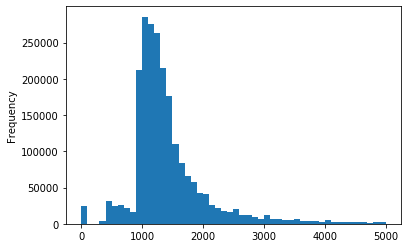

In [45]:
df.salario_mensal.plot.hist(bins=50, range=(0,5000))

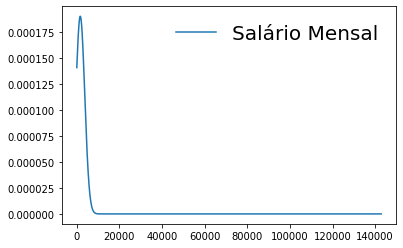

1039127    0.0
622432     0.0
622462     0.0
622463     0.0
1457667    0.0
Name: salario_mensal, dtype: float64

In [46]:
# plotando uma distribuição densidade de probabilidade para os salários

# criando uma figura com um gráfico 
mpl.rcParams['agg.path.chunksize'] = 0
fig, ax = plt.subplots(1, 1)
# definindo os valores de x
x = df.salario_mensal.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, sigma),label='Salário Mensal')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()
x.head()

In [47]:
#fazendo o teste de normalidade de shapiro
stats.shapiro(df.salario_mensal)
# verificamos que o resultado está muito longe de do ideal: (1,0)

(0.2637892961502075, 0.0)

In [48]:
# Vamos aplicar log para normalizar meu gráfico
df['salary_log'] = np.log(df.salario_mensal + 1)

In [49]:
df.salary_log.sort_values()
df.head(100)

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log
0,954.0,24,6,1,8,0.0,6.861711
1,2500.0,25,8,1,2,0.0,7.824446
2,0.0,55,2,1,8,0.0,0.000000
3,0.0,52,2,1,8,0.0,0.000000
4,0.0,32,2,1,8,0.0,0.000000
5,0.0,56,2,1,8,0.0,0.000000
6,0.0,22,2,1,8,0.0,0.000000
7,1061.0,50,4,2,2,0.0,6.967909
8,0.0,27,2,2,1,0.0,0.000000
9,0.0,34,2,2,1,0.0,0.000000


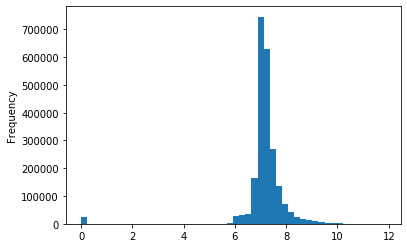

In [50]:
#ploto a distribuição para verificar a normalização
df.salary_log.plot.hist(bins=50)

In [51]:
stats.shapiro(df.salary_log)

(0.5028517246246338, 0.0)

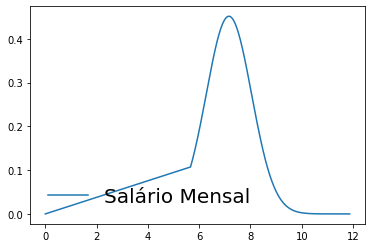

1039127    0.0
622432     0.0
622462     0.0
622463     0.0
1457667    0.0
Name: salary_log, dtype: float64

In [52]:
# plotando uma distribuição densidade de probabilidade para os salários

# criando uma figura com um gráfico 
mpl.rcParams['agg.path.chunksize'] = 0
fig, ax = plt.subplots(1, 1)
# definindo os valores de x
x = df.salary_log.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, sigma),label='Salário Mensal')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()
x.head()

In [53]:
mu = np.mean(df.salary_log)
sigma = np.std(df.salary_log)
mu, sigma

(7.160530692416338, 0.8831049225497479)

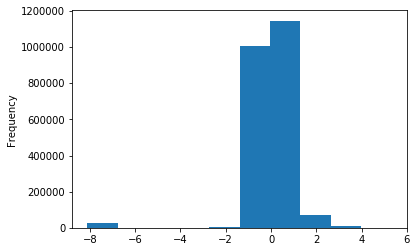

In [54]:
#Padronizando a minha normal
df['salary_logz'] = (df.salary_log - df.salary_log.mean())/df.salary_log.std()
df.salary_logz.plot.hist()

In [55]:
mu = df.salary_logz.mean()
std = df.salary_logz.std()

mu, std

(5.869206605173686e-12, 0.9999999999999915)

In [56]:
scipy.stats.norm.interval(alpha=0.95, loc=mu, scale=std)


(-1.959963984534168, 1.9599639845459067)

In [57]:
limite_inferior = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
limite_superior = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]

print (limite_inferior, '<-- desvio padrão -->', limite_superior)

-1.959963984534168 <-- desvio padrão --> 1.9599639845459067


In [91]:
#Descobrindo a quantidade de salários estatisticamente significativos e acima de 1,96
sal_sig_sup = df[df.salary_logz>1.96].shape[0]/df.salary_logz.shape[0]
sal_sig_inf = df[df.salary_logz<-1.96].shape[0]/df.salary_logz.shape[0]

print ('Estatisticamente Significativo abaixo da média:',sal_sig_inf*100,"%")
print ('Estatisticamente Significativo acimada média:',sal_sig_sup*100, "%")
print ('Total:',(sal_sig_inf + sal_sig_sup)*100, "%")

Estatisticamente Significativo abaixo da média: 1.0743316057767978 %
Estatisticamente Significativo acimada média: 1.3198171531475325 %
Total: 2.39414875892433 %


In [59]:
#Descobrindo a quantidade de salários estatisticamente significativos e abaixo de 1,96
sal_sig_inf = df[df.salary_logz<-1.96].shape[0]/df.salary_logz.shape[0]
print (sal_sig_inf*100,"%")

1.0743316057767978 %


In [60]:
df.head()

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz
0,954.0,24,6,1,8,0.0,6.861711,-0.338373
1,2500.0,25,8,1,2,0.0,7.824446,0.751796
2,0.0,55,2,1,8,0.0,0.000000,-8.108356
3,0.0,52,2,1,8,0.0,0.000000,-8.108356
4,0.0,32,2,1,8,0.0,0.000000,-8.108356


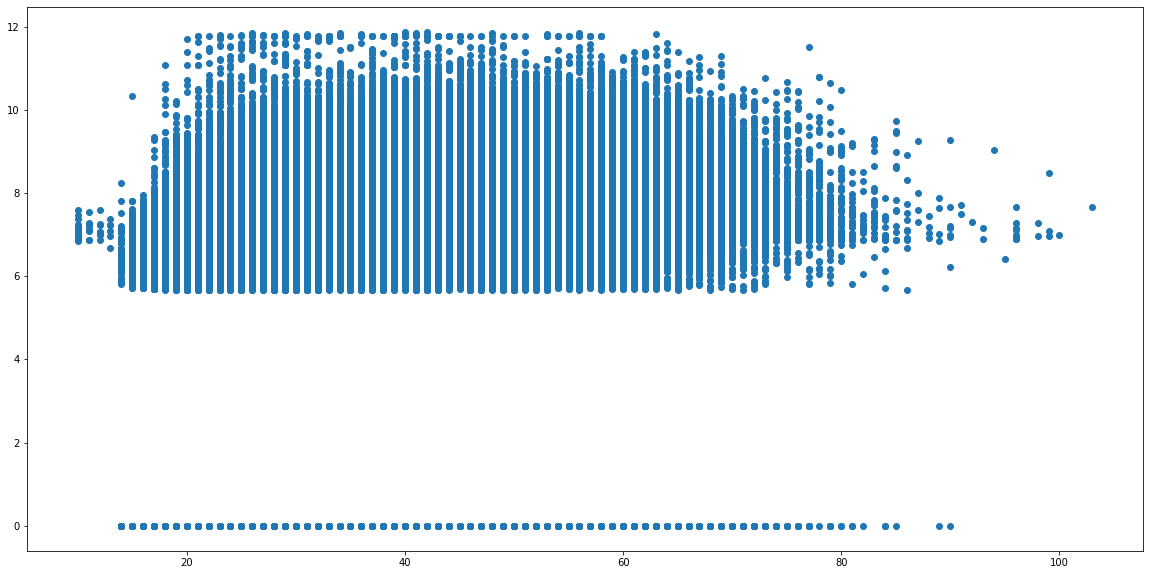

In [61]:
plt.figure(figsize=(20,10))
plt.scatter(x=df.Idade, y=df.salary_log)

In [63]:

df.corr() # Pra confirmar que a correlação entre Idade e Salário não é alta

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz
salario_mensal,1.000000,0.151294,0.184702,-0.042394,-0.077727,0.201733,0.443418,0.443418
Idade,0.151294,1.000000,-0.110878,-0.066302,-0.036528,0.276203,0.138125,0.138125
grau_instrucao,0.184702,-0.110878,1.000000,0.205090,-0.062680,0.041182,0.110415,0.110415
Sexo,-0.042394,-0.066302,0.205090,1.000000,-0.059259,0.009666,-0.063652,-0.063652
raca_cor,-0.077727,-0.036528,-0.062680,-0.059259,1.000000,-0.092636,-0.065860,-0.065860
tempo_emprego,0.201733,0.276203,0.041182,0.009666,-0.092636,1.000000,0.126529,0.126529
salary_log,0.443418,0.138125,0.110415,-0.063652,-0.065860,0.126529,1.000000,1.000000
salary_logz,0.443418,0.138125,0.110415,-0.063652,-0.065860,0.126529,1.000000,1.000000


In [64]:
df.Idade.head(10)

0    24
1    25
2    55
3    52
4    32
5    56
6    22
7    50
8    27
9    34
Name: Idade, dtype: int64

In [65]:
df.Idade.describe() #Idade média de 32 anos

count    2.256752e+06
mean     3.231423e+01
std      1.096019e+01
min      1.000000e+01
25%      2.300000e+01
50%      3.000000e+01
75%      3.900000e+01
max      1.030000e+02
Name: Idade, dtype: float64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 8 columns):
salario_mensal    float64
Idade             int64
grau_instrucao    int64
Sexo              int64
raca_cor          int64
tempo_emprego     float64
salary_log        float64
salary_logz       float64
dtypes: float64(4), int64(4)
memory usage: 137.7 MB


In [67]:
#Verificando se existe NaN  na coluna Idade
df.Idade.isna().sum()

0

In [68]:
#Verificando se existe Null na coluna Idade
df.Idade.isnull().sum()

0

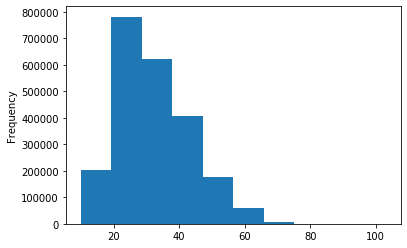

In [69]:
df.Idade.plot.hist()

In [70]:
df.rename(columns={'Idade': 'idade' })


,salario_mensal,idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz
0,954.0,24,6,1,8,0.0,6.861711,-0.338373
1,2500.0,25,8,1,2,0.0,7.824446,0.751796
2,0.0,55,2,1,8,0.0,0.000000,-8.108356
3,0.0,52,2,1,8,0.0,0.000000,-8.108356
4,0.0,32,2,1,8,0.0,0.000000,-8.108356
5,0.0,56,2,1,8,0.0,0.000000,-8.108356
6,0.0,22,2,1,8,0.0,0.000000,-8.108356
7,1061.0,50,4,2,2,0.0,6.967909,-0.218118
8,0.0,27,2,2,1,0.0,0.000000,-8.108356
9,0.0,34,2,2,1,0.0,0.000000,-8.108356


In [71]:
df.Idade

0          24
1          25
2          55
3          52
4          32
5          56
6          22
7          50
8          27
9          34
10         32
11         22
12         37
13         20
14         39
15         25
16         22
17         18
18         23
19         28
20         48
21         35
22         46
23         45
24         31
25         18
26         24
27         21
28         24
29         17
           ..
2256722    32
2256723    53
2256724    54
2256725    28
2256726    27
2256727    45
2256728    44
2256729    51
2256730    60
2256731    44
2256732    24
2256733    38
2256734    25
2256735    31
2256736    42
2256737    51
2256738    43
2256739    22
2256740    18
2256741    38
2256742    20
2256743    20
2256744    32
2256745    63
2256746    36
2256747    59
2256748    55
2256749    61
2256750    22
2256751    27
Name: Idade, Length: 2256752, dtype: int64

In [72]:
# states[(states['population'] > 19552860) & (states['area']>423967)]
df[(df["Idade"]==min(df['Idade']))]

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz
525652,1300.0,10,4,2,2,0.0,7.170888,0.011729
700459,1270.0,10,7,2,2,0.0,7.147559,-0.014688
700589,1175.0,10,9,2,2,0.0,7.069874,-0.102657
755342,1386.0,10,7,2,2,0.0,7.234898,0.084212
818105,1396.0,10,7,2,2,0.0,7.242082,0.092347
911526,1591.0,10,5,1,2,0.0,7.372746,0.240306
1029126,1386.0,10,7,2,2,1.0,7.234898,0.084212
1219878,1175.0,10,9,2,2,1.0,7.069874,-0.102657
1256193,1752.0,10,2,1,9,3.0,7.469084,0.349396
1456024,949.0,10,7,2,9,0.0,6.856462,-0.344318


In [73]:
stats.shapiro(df.Idade) #testando se a curva é normal

(0.9411314725875854, 0.0)

In [74]:
df['Idade_log'] = np.log(df.Idade)

In [75]:
stats.shapiro(df.Idade_log)

(0.9819164276123047, 0.0)

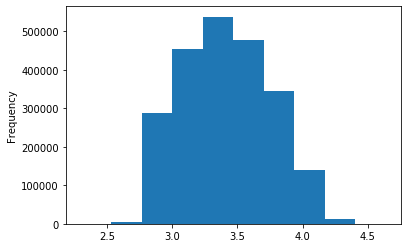

In [76]:
df.Idade_log.plot.hist()

In [77]:
# Padronizando
df['Idade_logz'] = (df.Idade_log - df.Idade_log.mean())/df.Idade_log.std()

In [78]:
df.head()

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz,Idade_log,Idade_logz
0,954.0,24,6,1,8,0.0,6.861711,-0.338373,3.178054,-0.734573
1,2500.0,25,8,1,2,0.0,7.824446,0.751796,3.218876,-0.610896
2,0.0,55,2,1,8,0.0,0.000000,-8.108356,4.007333,1.777875
3,0.0,52,2,1,8,0.0,0.000000,-8.108356,3.951244,1.607942
4,0.0,32,2,1,8,0.0,0.000000,-8.108356,3.465736,0.137010


In [79]:
x = df.Idade_logz.sort_values()
mu = x.mean()
std = x.std()
mu, std

(-3.453008176171285e-11, 1.000000000004205)

In [80]:
limite_inferior = scipy.stats.norm.interval(alpha=0.95, loc=mu, scale=std)
limite_inferior

(-1.959963984582826, 1.9599639845137657)

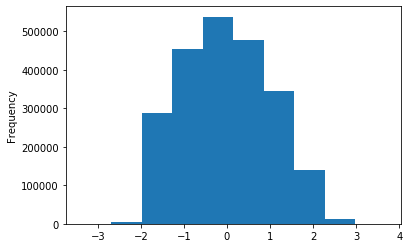

In [81]:
df.Idade_logz.plot.hist()

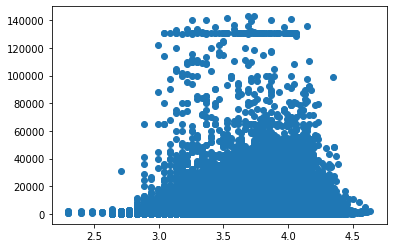

In [82]:
plt.scatter(x=df.Idade_log, y=df.salario_mensal) #Fica dificil verificar se há alguma correlação entre salario e idade

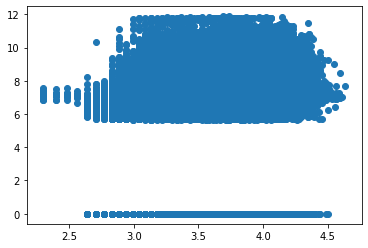

In [83]:
plt.scatter(x=df.Idade_log, y=df.salary_log) #Fica dificil verificar se há alguma correlação entre salario e idade

In [84]:
df.corr()

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz,Idade_log,Idade_logz
salario_mensal,1.000000,0.151294,0.184702,-0.042394,-0.077727,0.201733,0.443418,0.443418,0.156489,0.156489
Idade,0.151294,1.000000,-0.110878,-0.066302,-0.036528,0.276203,0.138125,0.138125,0.983514,0.983514
grau_instrucao,0.184702,-0.110878,1.000000,0.205090,-0.062680,0.041182,0.110415,0.110415,-0.089976,-0.089976
Sexo,-0.042394,-0.066302,0.205090,1.000000,-0.059259,0.009666,-0.063652,-0.063652,-0.064082,-0.064082
raca_cor,-0.077727,-0.036528,-0.062680,-0.059259,1.000000,-0.092636,-0.065860,-0.065860,-0.029238,-0.029238
tempo_emprego,0.201733,0.276203,0.041182,0.009666,-0.092636,1.000000,0.126529,0.126529,0.252897,0.252897
salary_log,0.443418,0.138125,0.110415,-0.063652,-0.065860,0.126529,1.000000,1.000000,0.153457,0.153457
salary_logz,0.443418,0.138125,0.110415,-0.063652,-0.065860,0.126529,1.000000,1.000000,0.153457,0.153457
Idade_log,0.156489,0.983514,-0.089976,-0.064082,-0.029238,0.252897,0.153457,0.153457,1.000000,1.000000
Idade_logz,0.156489,0.983514,-0.089976,-0.064082,-0.029238,0.252897,0.153457,0.153457,1.000000,1.000000


In [85]:
#Descobrindo a quantidade de salários estatisticamente significativos e acima de 1,96
#sal_sig_sup = df[df.salary_logz>1.96].shape[0]/df.salary_logz.shape[0]
#df[df['Idade_logz'] > 1.96].shape[0]/

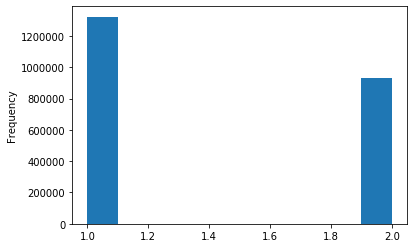

In [86]:
df.Sexo.plot.hist()

In [87]:
df.Sexo.mean()

1.4137029678050579

In [89]:
# identificando os dados
n=df.Sexo.value_counts()
p=0.5


# Calculando a média:
media = n*(1-p)
print('média =', media)

# Cálculo do desvio-padrão pela variância ( Sigma/n**0.5 ) ** 2 = p * ( 1-p )
std_amostral = ( n * p*( 1-p ) ) ** 0.5
print('desvio-padrão =', std_amostral)

# calculando e imprimindo o intervalo de confiança
int_inferior = media - 2*std_amostral
int_superior = media + 2*std_amostral
print('Intervalo de confiança:', int_inferior, '<-->', int_superior)


média = 1    661563.5
2    466812.5
Name: Sexo, dtype: float64
desvio-padrão = 1    575.136288
2    483.121362
Name: Sexo, dtype: float64
Intervalo de confiança: 1    660413.227424
2    465846.257277
Name: Sexo, dtype: float64 <--> 1    662713.772576
2    467778.742723
Name: Sexo, dtype: float64


In [92]:
df.Sexo.mean()

1.4137029678050579

In [93]:
df.Sexo.head(100)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     2
9     2
10    2
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    2
23    1
24    1
25    1
26    1
27    1
28    1
29    1
     ..
70    2
71    2
72    1
73    1
74    1
75    1
76    2
77    2
78    2
79    2
80    1
81    1
82    2
83    2
84    1
85    2
86    1
87    1
88    1
89    1
90    1
91    1
92    1
93    2
94    1
95    1
96    2
97    2
98    1
99    1
Name: Sexo, Length: 100, dtype: int64

In [238]:

""" Queremos testar a seguinte hipótese: Dentro da base queremos testar se as Mulheres entre 18-24 anos ganham
maior salário mensal que os homens da mesma faixa etária."""

' Queremos testar a seguinte hipótese: Dentro da base queremos testar se as Mulheres entre 18-24 anos ganham\nmaior salário mensal que os homens da mesma faixa etária.'

In [188]:
#Para avaliar os homens entre 18 e 24 anos, começamos criando um novo dataframe utilizando uma mascará do DataFrame principal.
filter = ((df.Idade > 17) & (df.Idade < 25) & (df.Sexo == 1))
df_homem = df.loc[filter]

In [189]:
df_homem.head() #Em nossa base agora só aparece Sexo = 1, que quer dizer masculino

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz,Idade_log,Idade_logz
0,954.0,24,6,1,8,0.0,6.861711,-0.338373,3.178054,-0.734573
6,0.0,22,2,1,8,0.0,0.000000,-8.108356,3.091042,-0.998190
11,1061.0,22,7,1,8,0.0,6.967909,-0.218118,3.091042,-0.998190
13,1061.0,20,6,1,2,0.0,6.967909,-0.218118,2.995732,-1.286949
16,1061.0,22,5,1,9,0.0,6.967909,-0.218118,3.091042,-0.998190


In [190]:
df_homem.info() # Podemos ver que não há valores nulos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338734 entries, 0 to 2256750
Data columns (total 10 columns):
salario_mensal    338734 non-null float64
Idade             338734 non-null int64
grau_instrucao    338734 non-null int64
Sexo              338734 non-null int64
raca_cor          338734 non-null int64
tempo_emprego     338734 non-null float64
salary_log        338734 non-null float64
salary_logz       338734 non-null float64
Idade_log         338734 non-null float64
Idade_logz        338734 non-null float64
dtypes: float64(6), int64(4)
memory usage: 28.4 MB


In [191]:
df_homem['salary_logz'] = (df_homem.salary_log - df_homem.salary_log.mean())/df_homem.salary_log.std()
#Padronizamos novamente

In [192]:
df_homem.head(10)

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz,Idade_log,Idade_logz
0,954.0,24,6,1,8,0.0,6.861711,-0.201818,3.178054,-0.734573
6,0.0,22,2,1,8,0.0,0.000000,-9.174464,3.091042,-0.998190
11,1061.0,22,7,1,8,0.0,6.967909,-0.062949,3.091042,-0.998190
13,1061.0,20,6,1,2,0.0,6.967909,-0.062949,2.995732,-1.286949
16,1061.0,22,5,1,9,0.0,6.967909,-0.062949,3.091042,-0.998190
17,1700.0,18,5,1,8,0.0,7.438972,0.553031,2.890372,-1.606157
18,1026.0,23,4,1,2,0.0,6.934397,-0.106771,3.135494,-0.863515
25,1200.0,18,5,1,8,0.0,7.090910,0.097891,2.890372,-1.606157
26,991.0,24,6,1,8,0.0,6.899723,-0.152112,3.178054,-0.734573
27,1061.0,21,7,1,8,0.0,6.967909,-0.062949,3.044522,-1.139130


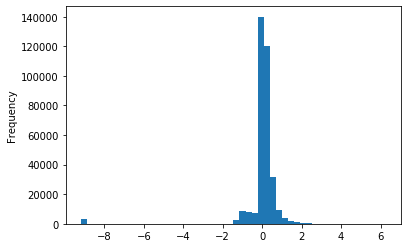

In [193]:
df_homem.salary_logz.plot.hist(bins=50) #Gráfico Padronizado e normalizado

In [195]:
stats.shapiro(df_homem.salary_logz) #Teste de Saphiro para verificar a normalidade

(0.38281238079071045, 0.0)

In [239]:
x = df_homem.salary_logz
mu = x.mean()
std = df_homem.salary_logz.std()
mu, std

(-2.738437974291378e-12, 0.9999999999997862)

In [240]:
h_limite_inferior = scipy.stats.norm.interval (alpha=0.95, loc=mu, scale=std)[0]
h_limite_superior = scipy.stats.norm.interval (alpha=0.95, loc=mu, scale=std)[1]

h_limite_inferior, h_limite_superior #Verificando os limites, verificamos que nossa padronização deu certo.

(-1.9599639845423735, 1.9599639845368966)

In [241]:
#Vamos trabalhar da mesma forma com os dados das mulheres. Primeiro, criamos o novo DataFrame
filter2 = ((df.Idade > 17) & (df.Idade < 25) & (df.Sexo == 2))
df_mulher = df.loc[filter2]

In [242]:
df_mulher.head() #Somente Sexo = 2, ou seja, somente sexo feminino.

,salario_mensal,Idade,grau_instrucao,Sexo,raca_cor,tempo_emprego,salary_log,salary_logz,Idade_log,Idade_logz
39,1179.0,20,7,2,2,0.0,7.073270,-0.098812,2.995732,-1.286949
40,2898.0,24,7,2,8,0.0,7.972121,0.919019,3.178054,-0.734573
60,1061.0,20,6,2,8,0.0,6.967909,-0.218118,2.995732,-1.286949
69,531.0,20,6,2,2,0.0,6.276643,-1.000886,2.995732,-1.286949
77,1061.0,21,4,2,8,0.0,6.967909,-0.218118,3.044522,-1.139130


In [245]:
df_mulher['salary_logz'] = (df_mulher.salary_log - df_mulher.salary_log.mean())/df_mulher.salary_log.std()

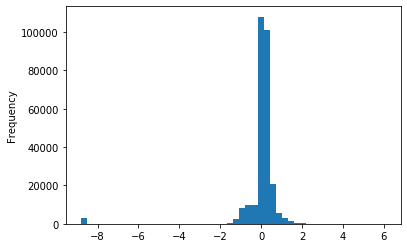

In [246]:
df_mulher.salary_logz.plot.hist(bins=50)

In [247]:
stats.shapiro(df_mulher['salary_logz'])

(0.3814220428466797, 0.0)

In [248]:
x1 = df_mulher.salary_logz
mu1 = x1.mean()
std1 = df_mulher.salary_logz.std()
mu1, std1

(-8.792944022229647e-13, 1.0000000000001015)

In [249]:
m_limite_inferior = scipy.stats.norm.interval (alpha=0.95, loc=mu1, scale=std1)[0]
m_limite_superior = scipy.stats.norm.interval (alpha=0.95, loc=mu1, scale=std1)[1]

m_limite_inferior, m_limite_superior #De mesma forma, nossa padronização deu certo

(-1.9599639845411323, 1.9599639845393737)

In [253]:
#Para plotar o gráfico, voltaremos um passo adiante e trabalharemos com o salário mensal em forma de log,
# Mas não padronizado

x = df_homem.salary_log
mu = x.mean()
std = df_homem.salary_log.std()
mu, std

h_limite_inferior = scipy.stats.norm.interval (alpha=0.95, loc=mu, scale=std)[0]
h_limite_superior = scipy.stats.norm.interval (alpha=0.95, loc=mu, scale=std)[1]

h_limite_inferior, h_limite_superior

(5.5171923388026505, 8.514904964482833)

In [254]:
x1 = df_mulher.salary_log
mu1 = x1.mean()
std1 = df_mulher.salary_log.std()
mu1, std1

m_limite_inferior = scipy.stats.norm.interval (alpha=0.95, loc=mu1, scale=std1)[0]
m_limite_superior = scipy.stats.norm.interval (alpha=0.95, loc=mu1, scale=std1)[1]

m_limite_inferior, m_limite_superior

(5.419035781392624, 8.520974839282143)

In [ ]:
#Verificamos que na escala logaritimica, os limites inferiores e superiores são muito parecidos

In [258]:
df_homem.salary_log.mean(), df_mulher.salary_log.mean() #Verificamos que na escala logaritimica, as médias são parecidas

(7.016048651642742, 6.970005310337384)

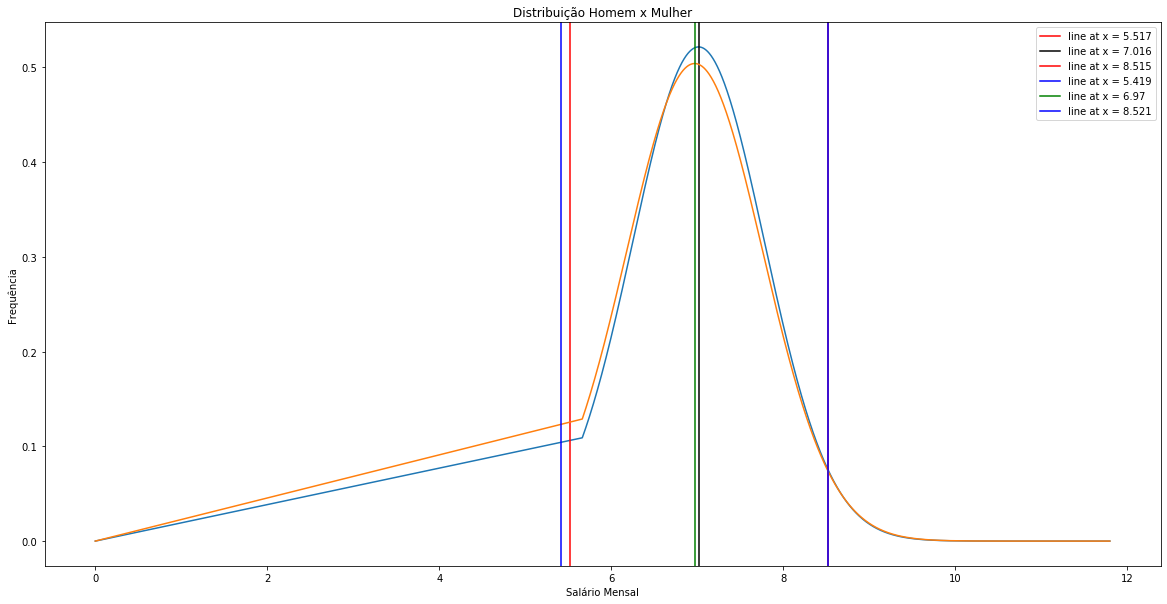

In [256]:
#PLOTA TODOS OS GRAFICOS :D

fig, ax = plt.subplots(1, 1, figsize = (20,10)) #cria a matriz de plotagem com 6 graficos


#plota a curva de densidade do salario mensal
x = df_homem.salary_log.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, std))
ax.set(xlabel='Salário Mensal', ylabel='Frequência')

# x coordinates for the lines
xcoords = [round(h_limite_inferior,3),round(mu,3),round(h_limite_superior,3)]
# colors for the lines
colors = ['r','k','r','b']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

#plota a curva de densidade do salario mensal
x1 = df_mulher.salary_log.sort_values()
# calculando a média
mu1 = x1.mean()
# calculando o desvio padrão populacional
sigma1 = x1.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu1, std1))
ax.set_title("Distribuição Homem x Mulher")

# x coordinates for the lines
xcoords = [round(m_limite_inferior,3),round(mu1,3),round(m_limite_superior,3)]
# colors for the lines
colors = ['b','g','b','k']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

plt.legend()
plt.show()

In [259]:
"""Considerações: Homens e mulheres possuem um desvio padrão similar. Plotando um gráfico sobre o outro,
verificamos que não há diferença significativa em seus limites superiores para inferirmos que mulheres 
ganham mais que os homens.
"""

'Considerações: Homens e mulheres possuem um desvio padrão similar. Plotando um gráfico sobre o outro,\nverificamos que não há diferença significativa em seus limites superiores para inferirmos que mulheres \nganham mais que os homens.\n'